In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv(r'C:\Users\dcent\OneDrive\Desktop\Data Analyst\Portfolio Projects\Python\Movies\movies1.csv')


In [2]:
#View Data
df.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleasedDate,ReleasedCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,6/13/1980,United States)
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,7/2/1980,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,6/20/1980,United States)
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,7/2/1980,United States)
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,7/25/1980,United States)


In [3]:
#Checking Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
ReleasedDate - 0.0002608242044861763%
ReleasedCountry - 0.0002608242044861763%


In [4]:
#Observing Data Types
df.dtypes


name                object
rating              object
genre               object
year                 int64
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
ReleasedDate        object
ReleasedCountry     object
dtype: object

In [5]:
#Changing Data Types for Specific Columns and filling NaN

df = df.convert_dtypes(infer_objects=False,convert_string=False)
df['gross'] = df['gross'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')


In [6]:
#Correcting Release Year
df['correctedyear'] = df['ReleasedDate'].astype('string').str[-4:]  


In [7]:
#Correcting Release Country
df['C_ReleasedCountry']= df['ReleasedCountry'].astype('string').str[:-1]
df.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleasedDate,ReleasedCountry,correctedyear,C_ReleasedCountry
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,6/13/1980,United States),1980,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,7/2/1980,United States),1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,6/20/1980,United States),1980,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,7/2/1980,United States),1980,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,7/25/1980,United States),1980,United States


In [8]:
#Removing Duplicates
df.drop_duplicates()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleasedDate,ReleasedCountry,correctedyear,C_ReleasedCountry
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,6/13/1980,United States),1980,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,7/2/1980,United States),1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,6/20/1980,United States),1980,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,7/2/1980,United States),1980,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,7/25/1980,United States),1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90,10/23/2020,United States),2020,United States
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2/7/2020,United States),2020,United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,<NA>,4/27/2020,Cameroon),2020,Cameroon
7666,It's Just Us,NaN,Drama,2020,<NA>,<NA>,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120,10/1/2020,United States),2020,United States


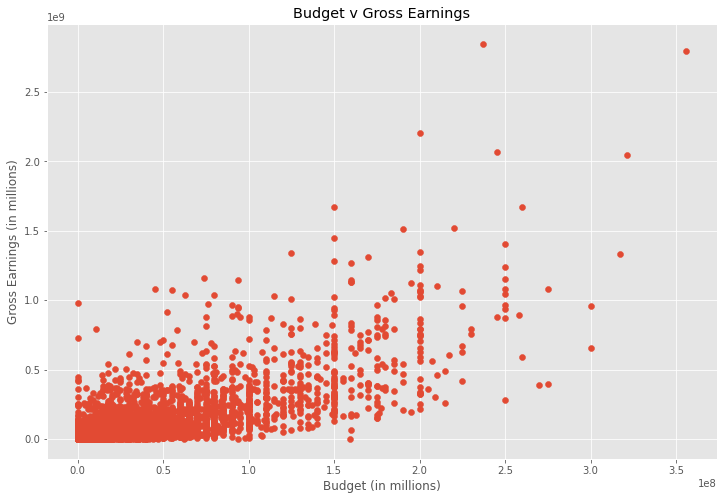

In [9]:
#Scatter Plot: Budget v Gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget v Gross Earnings')

plt.xlabel('Budget (in millions)')
plt.ylabel('Gross Earnings (in millions)')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

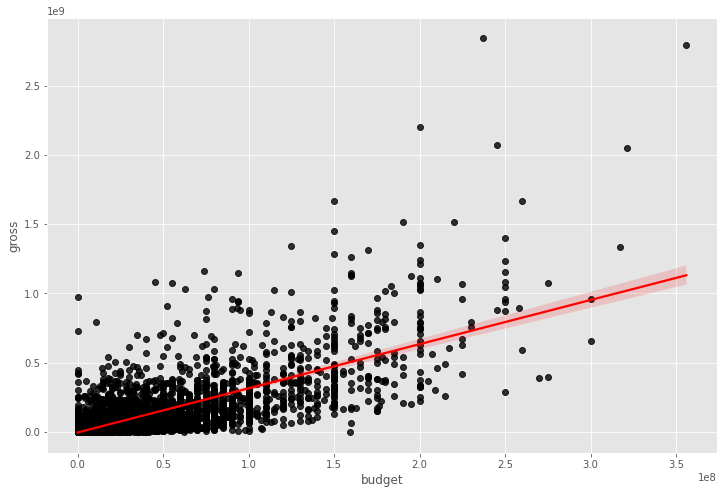

In [10]:
#Seaborn Plot: Budget v Gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"black"}, line_kws={"color":'red'})


Text(87.0, 0.5, 'Movie Characteristics')

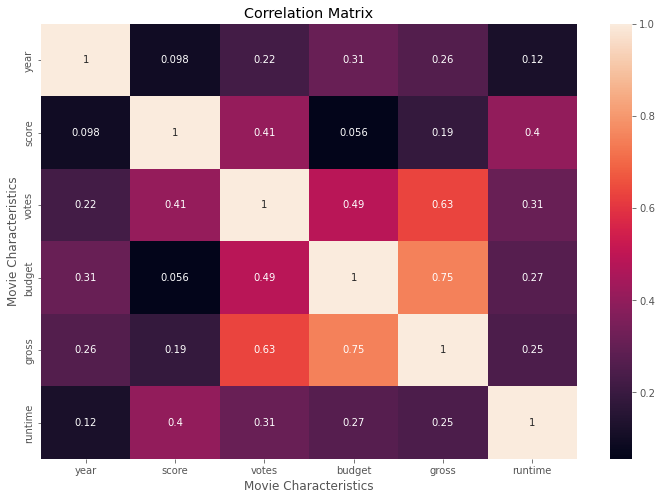

In [11]:
#Pearson Correlation and Correlation Matrix
corr_matrix= df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)

plt.title('Correlation Matrix')

plt.xlabel('Movie Characteristics')
plt.ylabel('Movie Characteristics')


In [12]:
#Categorical Variable Transformation
df_numeric = df
df_numeric['C_ReleasedCountry'] = df['C_ReleasedCountry'].astype('object')

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleasedDate,ReleasedCountry,correctedyear,C_ReleasedCountry
0,6587,6,6,1980,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1931,56,1980,56
1,5573,6,1,1980,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,2253,56,1980,56
2,5142,4,0,1980,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1987,56,1980,56
3,286,4,4,1980,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,2253,56,1980,56
4,1027,6,4,1980,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,2302,56,1980,56


Text(86.09375, 0.5, 'Movie Characteristics')

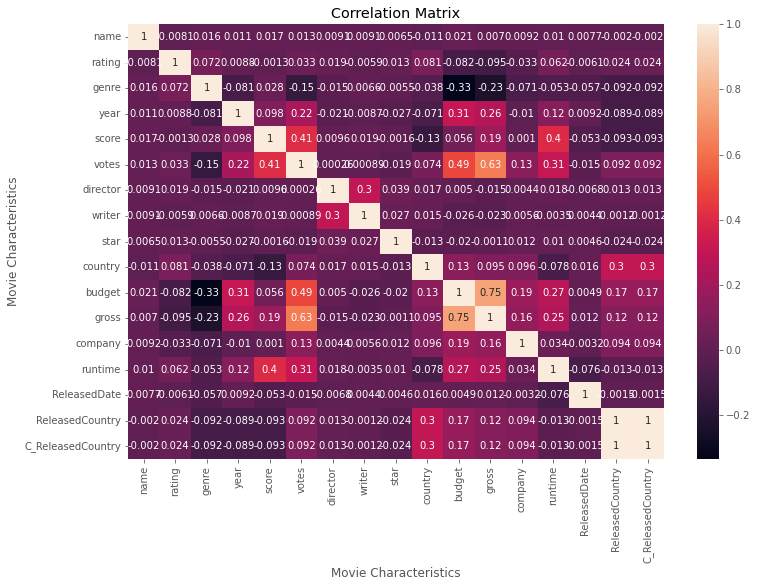

In [13]:
#Pearson Correlation and Correlation Matrix for df_numeric
corr_matrix= df_numeric.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)

plt.title('Correlation Matrix')

plt.xlabel('Movie Characteristics')
plt.ylabel('Movie Characteristics')


In [15]:
#Looking at correlations between other features
corr_mat = df_numeric.corr(method='pearson')
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

high_corr

votes              gross                0.632834
gross              votes                0.632834
budget             gross                0.750157
gross              budget               0.750157
name               name                 1.000000
star               star                 1.000000
ReleasedCountry    ReleasedCountry      1.000000
rating             rating               1.000000
genre              genre                1.000000
year               year                 1.000000
score              score                1.000000
votes              votes                1.000000
director           director             1.000000
ReleasedCountry    C_ReleasedCountry    1.000000
writer             writer               1.000000
country            country              1.000000
budget             budget               1.000000
gross              gross                1.000000
company            company              1.000000
runtime            runtime              1.000000
ReleasedDate       R